<a href="https://colab.research.google.com/github/Tclack88/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module1-join-and-reshape-data/LS_DS_121_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [4]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-09-10 03:59:25--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.110.213
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.110.213|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  35.1MB/s    in 6.1s    

2019-09-10 03:59:31 (32.0 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [5]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [6]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [7]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
import pandas as pd
import seaborn as sb

In [0]:
order_products__prior = pd.read_csv("order_products__prior.csv")
order_products__train = pd.read_csv("order_products__train.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")
aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")

In [10]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [11]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [12]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


From products, need:
- product_id
- product_name

In [13]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


From orders, need:
- order_id ???

In [14]:
order_products = pd.concat([order_products__prior,order_products__train])
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


from order_products, need:
- order_id
- product_id

In [0]:
# Shorten "products" and "order_products" to just the relevant information
products = products[['product_id','product_name']]
order_products = order_products[['order_id','product_id']]

In [16]:
relevent_data = pd.merge(products,order_products,how='inner',on='product_id')
relevent_data.head(10)


,product_id,product_name,order_id
0,1,Chocolate Sandwich Cookies,1107
1,1,Chocolate Sandwich Cookies,5319
2,1,Chocolate Sandwich Cookies,7540
3,1,Chocolate Sandwich Cookies,9228
4,1,Chocolate Sandwich Cookies,9273
5,1,Chocolate Sandwich Cookies,9696
6,1,Chocolate Sandwich Cookies,11140
7,1,Chocolate Sandwich Cookies,11485
8,1,Chocolate Sandwich Cookies,12672
9,1,Chocolate Sandwich Cookies,13668


In [17]:
top_10_products = list(relevent_data.product_name.value_counts().index[:10])
top_10_product_counts = list(relevent_data.product_name.value_counts()[:10])
print("Number of orders for top grossing products:\n")
for i in range(10):
  print(top_10_products[i],':',top_10_product_counts[i])

Number of orders for top grossing products:

Banana : 491291
Bag of Organic Bananas : 394930
Organic Strawberries : 275577
Organic Baby Spinach : 251705
Organic Hass Avocado : 220877
Organic Avocado : 184224
Large Lemon : 160792
Strawberries : 149445
Limes : 146660
Organic Whole Milk : 142813


## Reshape Data Section

- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
- Table 2 --> Tidy
- Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

### Replicated Code Below

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sb

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

In [19]:
table1 = table1.reset_index()
table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [20]:
tidy = table1.melt(id_vars='index',value_vars=['treatmenta','treatmentb'])
tidy

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [21]:
newnames = {'index':'name','variable':'trt','value':'result'}
tidy = tidy.rename(columns=newnames)
tidy

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [22]:
tidy.trt = tidy.trt.str.replace('treatment','')
tidy

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


## Table2 -> Tidy --- Assignment Exercise

In [23]:
table2.head()


,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [24]:
table2 = table2.reset_index()
tidy = table2.melt(id_vars = 'index', value_vars=['John Smith','Jane Doe','Mary Johnson'])
tidy = tidy[['variable','index','value']]
tidy = tidy.rename(columns={'index':'trt'})
tidy.trt = tidy.trt.str.replace('treatment','')
tidy

,variable,trt,value
0,John Smith,a,NaN
1,John Smith,b,2.0
2,Jane Doe,a,16.0
3,Jane Doe,b,11.0
4,Mary Johnson,a,3.0
5,Mary Johnson,b,1.0


## Tidy -> Table 2 --- Assignment Exercise

In [25]:
table2 = tidy.pivot_table(index='trt',columns='variable',values='value')
table2 = table2[['John Smith','Jane Doe','Mary Johnson']]
table2

variable,John Smith,Jane Doe,Mary Johnson
trt,,,
a,NaN,16.0,3.0
b,2.0,11.0,1.0


## Flights
Load seaborn's flights dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
flights = sb.load_dataset('flights')

In [27]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [28]:
pt = flights.pivot_table(index='year',columns='month',values='passengers')
print(pt.shape)
pt

(12, 12)


month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [29]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [32]:
products.head()

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce


In [33]:
order_products.head()

,order_id,product_id
0,2,33120
1,2,28985
2,2,9327
3,2,45918
4,2,30035


In [51]:
#order_hour_of_day in orders links to order_products via order_id then to products via product_id
# Most popular is defined as > 2900 orders. This while loop begins at 23 (11pm) then sequentially drops down until the 25th most popular item exceeds 2900
# Note: The statement that 24 of the 25 are ice creams seems not to be accurate
lowest_value = 0
i = 23
while lowest_value < 2900:
  late_orders = orders[orders.order_hour_of_day == i]
  popular_late_orders = late_orders.merge(order_products, on="order_id").merge(products, on='product_id')
  lowest_value  = popular_late_orders.product_name.value_counts()[i]
  i -= 1

print("25 Most popular items ordered at or after "+str(i)+":00 hrs:\n")
popular_late_orders.product_name.value_counts()[:25]



25 Most popular items ordered at or after 1800 hrs:


Banana                      19625
Bag of Organic Bananas      15428
Organic Strawberries        10922
Organic Baby Spinach         9777
Organic Hass Avocado         8680
Organic Avocado              7346
Large Lemon                  5693
Strawberries                 5644
Organic Raspberries          5499
Organic Whole Milk           5497
Limes                        5255
Organic Blueberries          4151
Cucumber Kirby               4044
Organic Garlic               4006
Organic Yellow Onion         3978
Organic Zucchini             3940
Organic Lemon                3536
Organic Grape Tomatoes       3434
Organic Fuji Apple           3429
Seedless Red Grapes          3319
Organic Cucumber             3283
Apple Honeycrisp Organic     3187
Honeycrisp Apple             3112
Organic Baby Carrots         2986
Organic Gala Apples          2943
Name: product_name, dtype: int64

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
# Hour of Dat Ordered vs Percent of Orders by Product
# Three foods I eat often: Whole Milk, Bluberries, Ground Beef. They are all in this list. I will plot them as percent purchased during the day
# print('Ground Beef' in list(popular_late_orders.product_name.unique())) # <---- Checking for my 3 common foods like this
my_food_list = ['Milk','Ground Beef','Blueberries']
food = orders[['order_id','order_hour_of_day']].merge(order_products,on='order_id').merge(products,on='product_id')


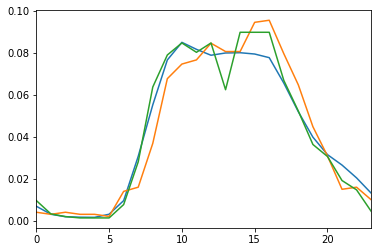

In [90]:
milk = food[food.product_name == 'Milk']
ground_beef = food[food.product_name == 'Ground Beef']
blueberries = food[food.product_name =='Blueberries']
blueberries.order_hour_of_day.value_counts(normalize=True).sort_index().plot();
ground_beef.order_hour_of_day.value_counts(normalize=True).sort_index().plot();
milk.order_hour_of_day.value_counts(normalize=True).sort_index().plot();
